In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For Plotting

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-exp-mat/EEG_exp(1).mat


# Basic Representation Of Signals

<Figure size 640x480 with 0 Axes>

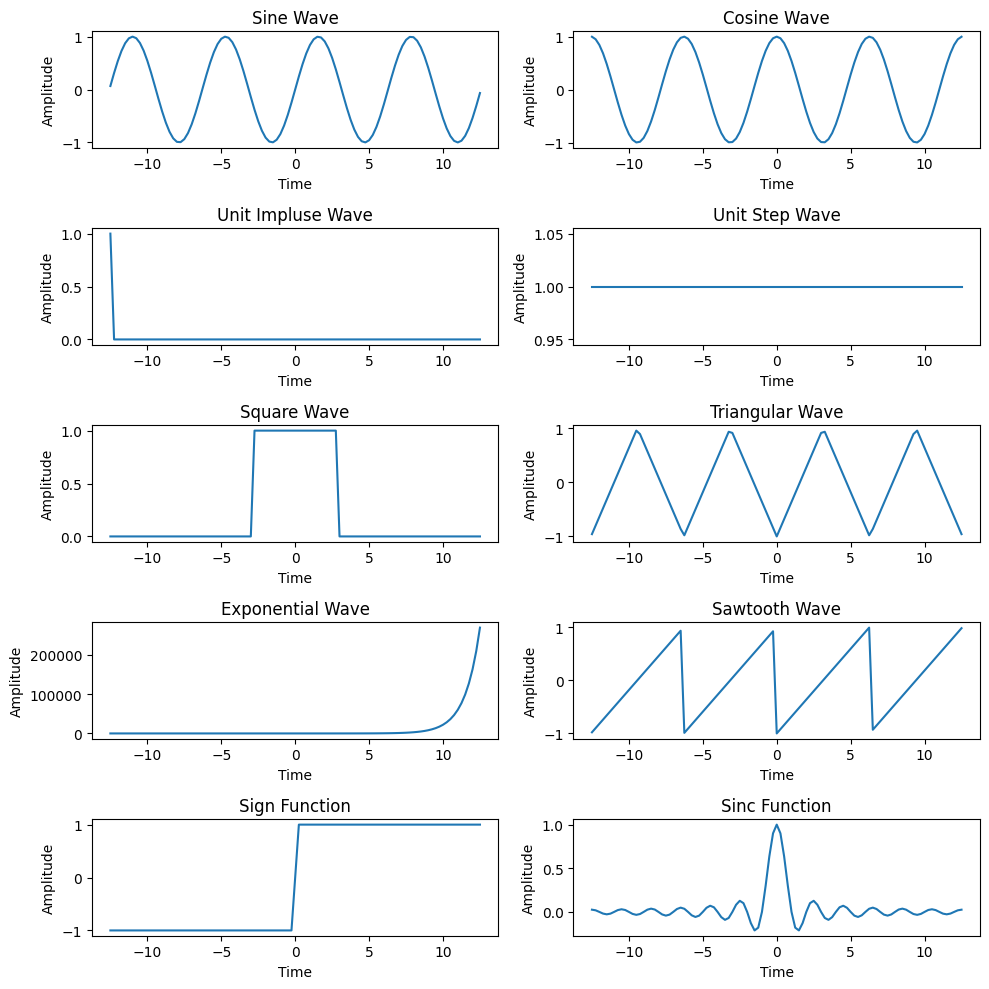

In [9]:
import scipy.signal as signal
x = np.linspace(-12.5, 12.5, 101)
plt.figure()

y1 = np.sin(x)
y2 = np.cos(x)
y3 = signal.unit_impulse(len(x))
y4 = np.where(x>=0, 1, 1)
y5 = np.where((x>-3) & (x < 3), 1, 0)
y6 = signal.sawtooth(x,0.5)
y7 = np.exp(x)
y8 = signal.sawtooth(x)
y9 = np.sign(x)
y10 = np.sinc(x)

wave_name = ['Sine Wave', 'Cosine Wave', 'Unit Impluse Wave', 'Unit Step Wave', 'Square Wave', 'Triangular Wave', 'Exponential Wave',
             'Sawtooth Wave', 'Sign Function','Sinc Function']
y = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10]

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(x,y[i])
    plt.title(wave_name[i])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")

plt.tight_layout()
plt.show()

Corrections - unit_impulse requires idx = 'mid' parameter to centre the impulse at the centre.

<Figure size 640x480 with 0 Axes>

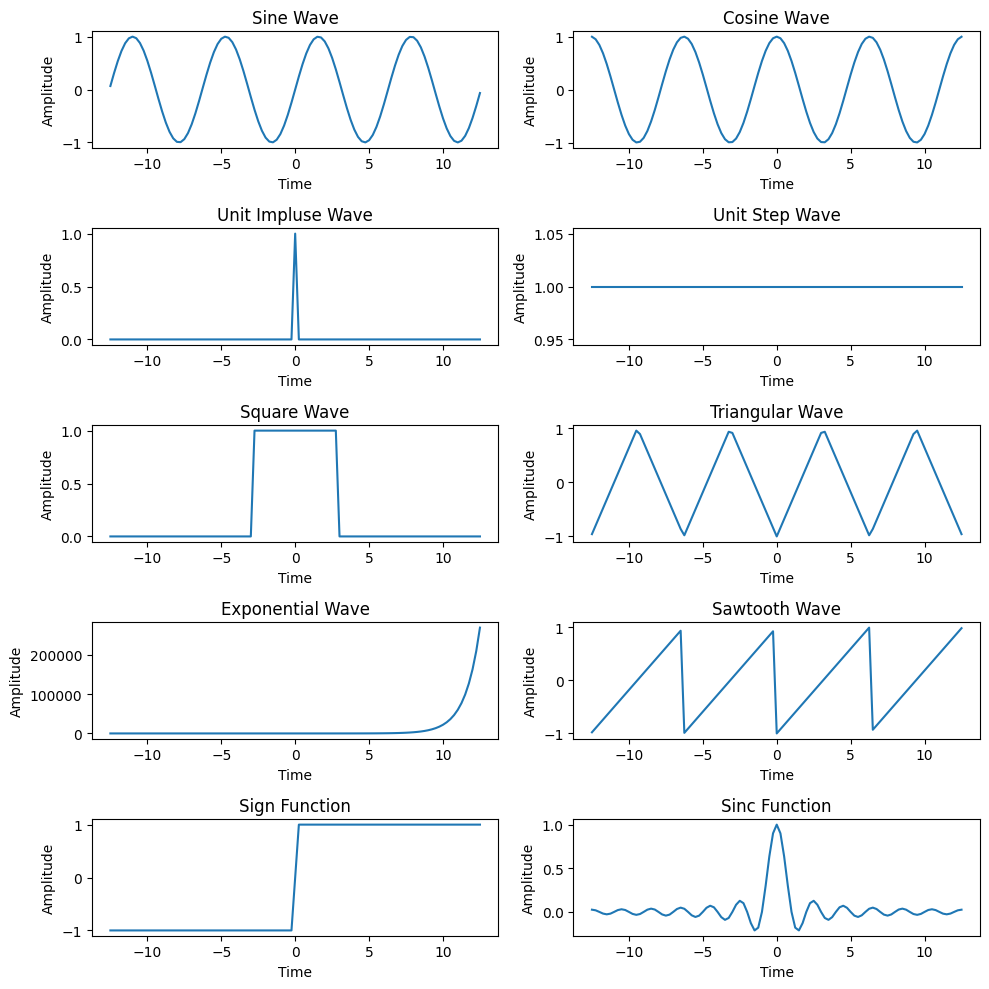

In [10]:
import scipy.signal as signal
x = np.linspace(-12.5, 12.5, 101)
plt.figure()

y1 = np.sin(x)
y2 = np.cos(x)
y3 = signal.unit_impulse(len(x),idx='mid')
y4 = np.where(x>=0, 1, 1)
y5 = np.where((x>-3) & (x < 3), 1, 0)
y6 = signal.sawtooth(x,0.5)
y7 = np.exp(x)
y8 = signal.sawtooth(x)
y9 = np.sign(x)
y10 = np.sinc(x)

wave_name = ['Sine Wave', 'Cosine Wave', 'Unit Impluse Wave', 'Unit Step Wave', 'Square Wave', 'Triangular Wave', 'Exponential Wave',
             'Sawtooth Wave', 'Sign Function','Sinc Function']
y = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10]

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(x,y[i])
    plt.title(wave_name[i])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")

plt.tight_layout()
plt.show()

# Sampling Theorem

In [36]:
def samplingTest():
    Fm = 100
    t1 = np.linspace(0,0.1,200)
    y1 = np.sin(2 * np.pi * Fm * t1 + np.pi/6)

    fig, axs = plt.subplots(1, 2, figsize=(10,4), constrained_layout = True)
    axs[0].plot(t1,y1,label="continuous")
    axs[0].set_title("Sine Wave")
    axs[0].set_xlabel("time in sec")
    axs[0].set_ylabel("y(t)")

    fs1 = int(input("Enter the sampling frequency: "))
    n1 = np.arange(0,0.1*fs1)/fs1

    y2 = np.sin(2 * np.pi * Fm * n1 + np.pi/6)
    axs[1].plot(n1, y2, 'o-', label="sampled")
    axs[1].set_title(f"Discrete time signal with fs = {fs1}")
    axs[1].set_xlabel("time in sec")
    axs[1].set_ylabel("y(t)")

### Sampling Frequency below 2F

Enter the sampling frequency:  175


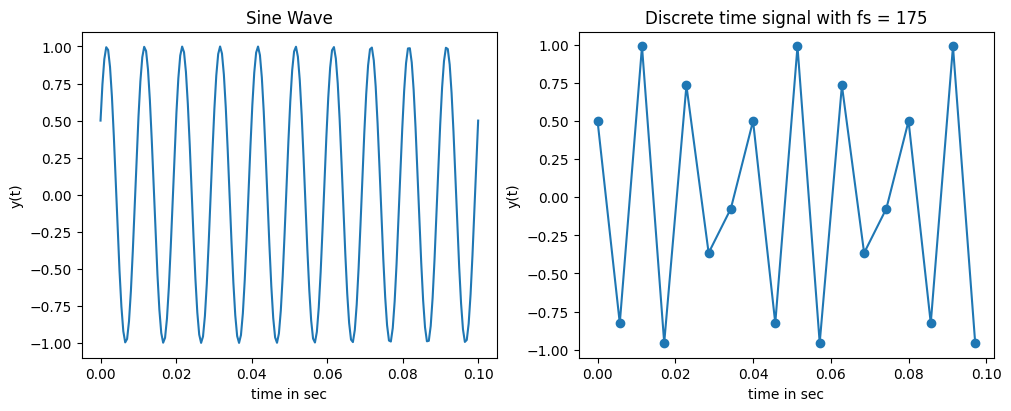

In [37]:
samplingTest()

### Sampling Frequency equals 2F

Enter the sampling frequency:  200


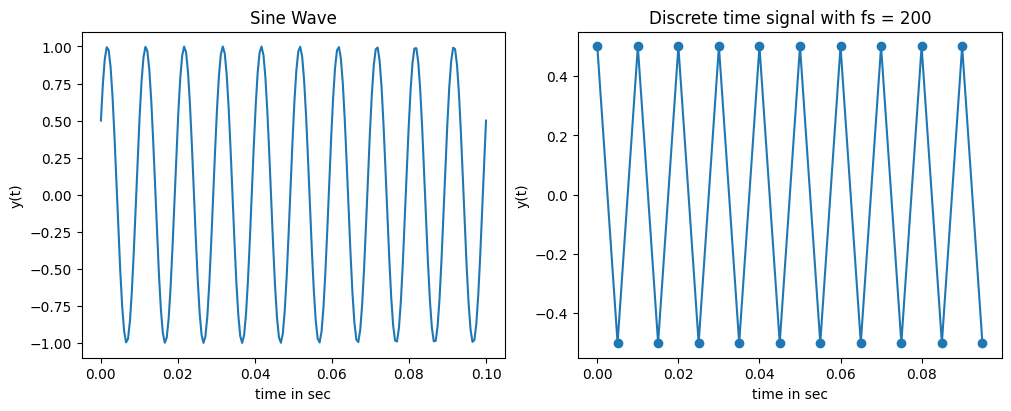

In [38]:
samplingTest()

### Sampling Frequency above 2F

Enter the sampling frequency:  600


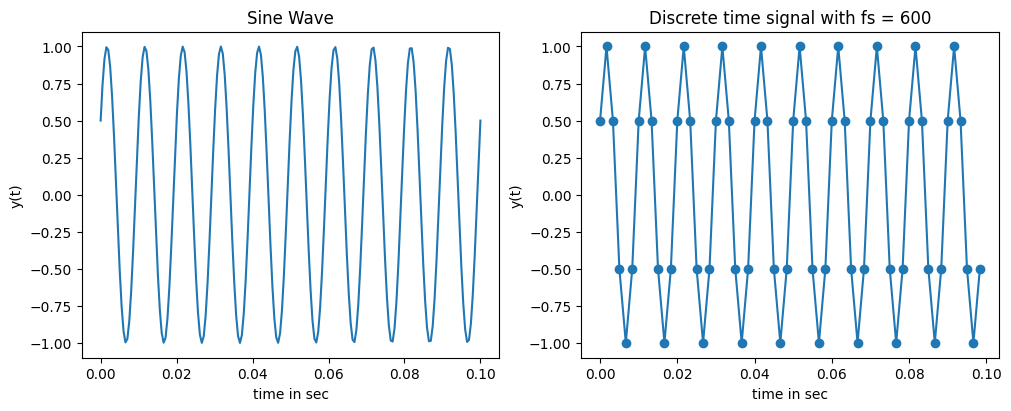

In [39]:
samplingTest()

# Addition Of Two Discrete Time Signals

In [41]:
def gcd(x, y):
    while y:
        x, y = y, x % y
    return x

def lcm(x, y):
    return (x * y) // gcd(x, y)

In [50]:
def main():
    A, F1, Phi, Fs = 0.5, 10, 0, 60
    
    B, F2 = 0.3, 15
    
    J = 6 # Number of cycles to plot

    nSamplesPeriod1 = int(Fs / F1)
    nSamplesPeriod2 = int(Fs / F2)
    
    nSamplesPeriod_LCM = lcm(nSamplesPeriod1, nSamplesPeriod2)
    print(f"Samples per cycle: N1={nSamplesPeriod1}, N2={nSamplesPeriod2}, LCM={nSamplesPeriod_LCM}")

    sTime = 0
    eTime = (J * nSamplesPeriod_LCM) / Fs #LCM / Fs (for 1 cycle) * J (for J no of cycles?)
    
    t = np.arange(sTime, eTime + 1/Fs, 1.0/Fs) # Add 1/Fs to include the end point
    
    y1 = A * np.cos(2 * np.pi * F1 * t + Phi)
    y2 = B * np.cos(2 * np.pi * F2 * t + Phi)
    y3 = y1 + y2

    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, y1, label='y1[n]', linestyle='--', color='red')
    plt.plot(t, y2, label='y2[n]', linestyle='--', color='green')
    plt.title(f"y1[n] and y2[n] Overlaid")
    plt.xlabel("n (samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(t, y3, label='y3[n]', linestyle='--', color='blue')
    plt.title(f"y3[n] - J={J} Cycles")
    plt.xlabel("n (samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Samples per cycle: N1=6, N2=4, LCM=12


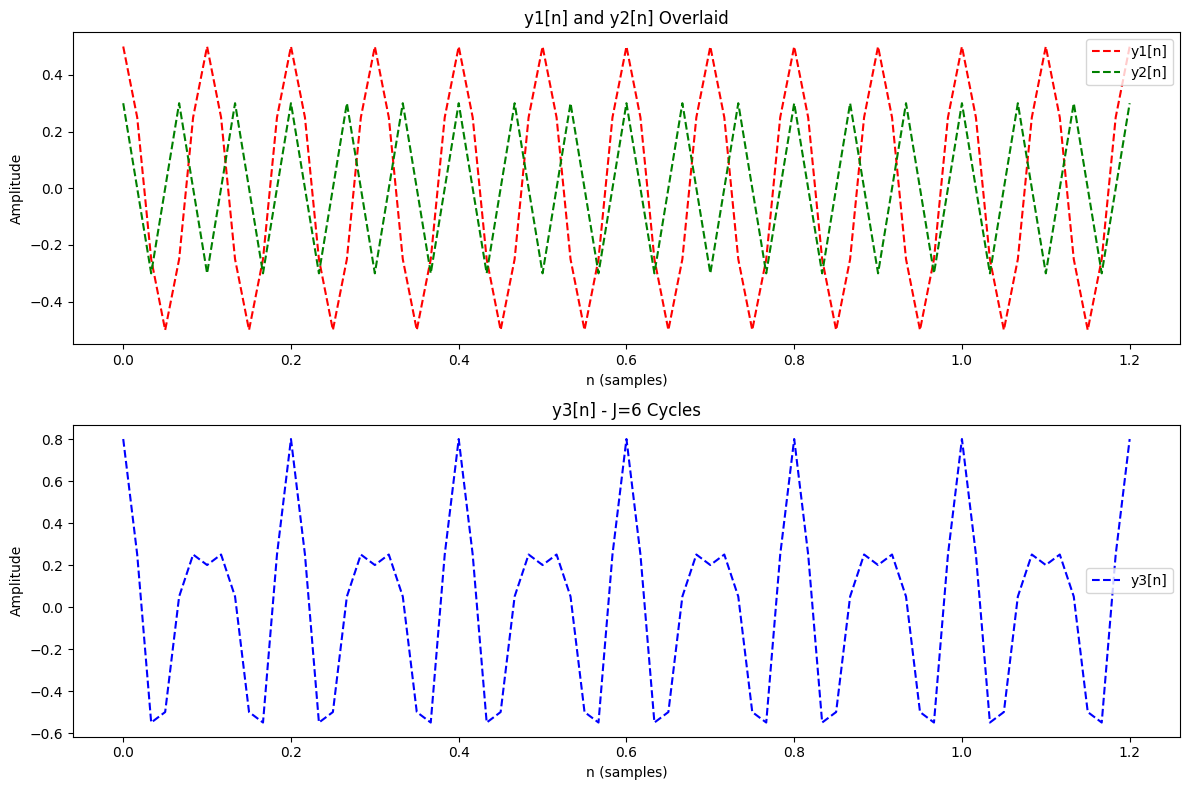

In [51]:
main()

# Plotting Natural Signal - EEG

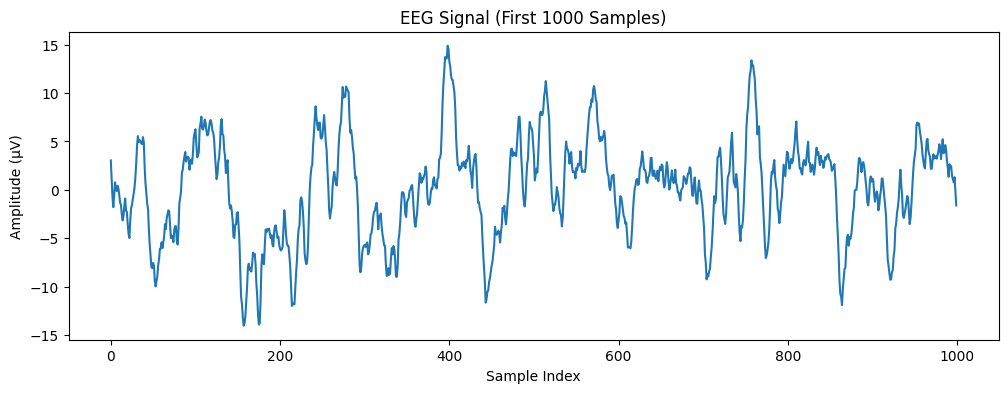

In [54]:
from scipy import io

EEG_data = io.loadmat('/kaggle/input/eeg-exp-mat/EEG_exp(1).mat', squeeze_me=True)
EEG = EEG_data['EEG']
fs = EEG_data['fs']

plt.figure(figsize=(12,4))
plt.plot(EEG[:1000])
plt.title("EEG Signal (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude (µV)")
plt.show()


# Analog To Digital Conversion

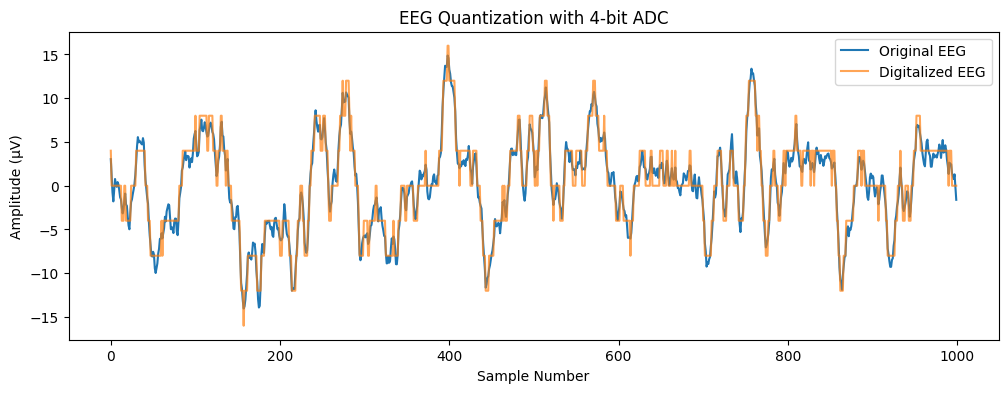

In [58]:
min_v, max_v = -32, 32
bits = 4
delta_v = (max_v - min_v) / (2**bits)

ADC_levels = np.arange(min_v, max_v, delta_v) + delta_v/2
EEG_quant = np.digitize(EEG, bins=ADC_levels)*delta_v + min_v

plt.figure(figsize=(12,4))
plt.plot(EEG[:1000], label="Original EEG")
plt.plot(EEG_quant[:1000], label="Digitalized EEG", alpha=0.7)
plt.title("EEG Quantization with 4-bit ADC")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude (µV)")
plt.legend()
plt.show()


# Down Sampling

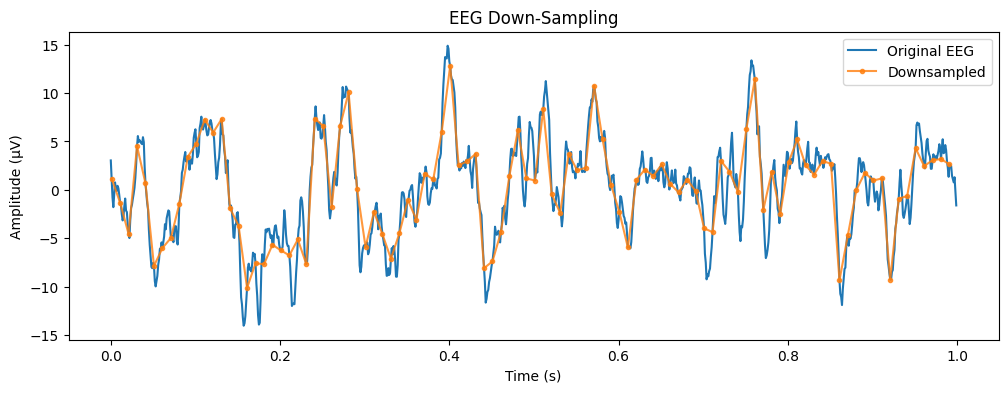

In [59]:
dt = 1/fs
T_exp = len(EEG) / fs
t_EEG = np.arange(0, T_exp, dt)

d_rate = 10
plt.figure(figsize=(12,4))
plt.plot(t_EEG[:1000], EEG[:1000], label="Original EEG")
plt.plot(t_EEG[1:1000:d_rate], EEG[1:1000:d_rate], '.-', label="Downsampled", alpha=0.8)
plt.title("EEG Down-Sampling")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.legend()
plt.show()
